In [13]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv

--2025-06-25 09:08:16--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941521 (2.8M) [text/plain]
Saving to: ‘medical_examination.csv.1’

medical_examination 100%[===================>]   2.80M  --.-KB/s    in 0.01s   

2025-06-25 09:08:16 (230 MB/s) - ‘medical_examination.csv.1’ saved [2941521/2941521]



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def draw_cat_plot():
    df = pd.read_csv('medical_examination.csv')
    df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)
    df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
    df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat).fig
    return fig

def draw_heat_map():
    df = pd.read_csv('medical_examination.csv')
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', square=True, ax=ax)
    return fig

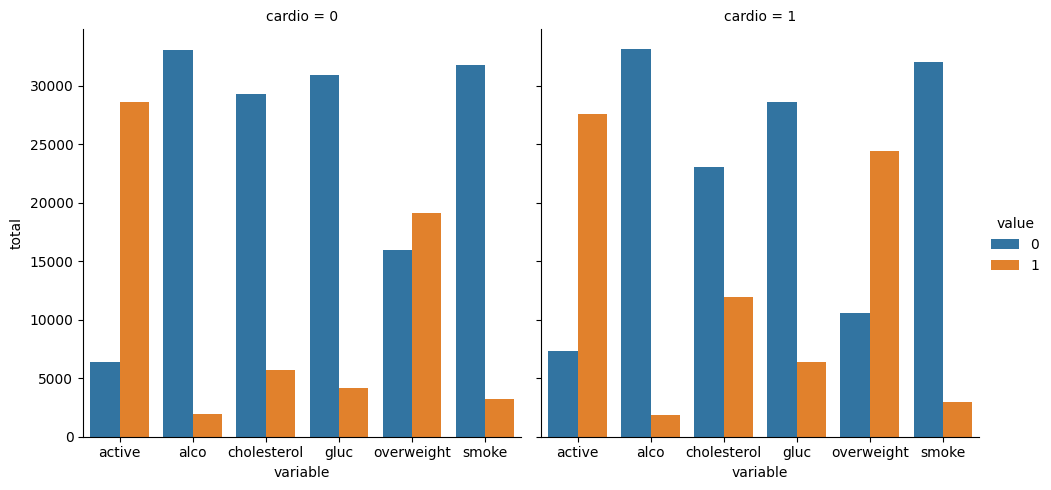

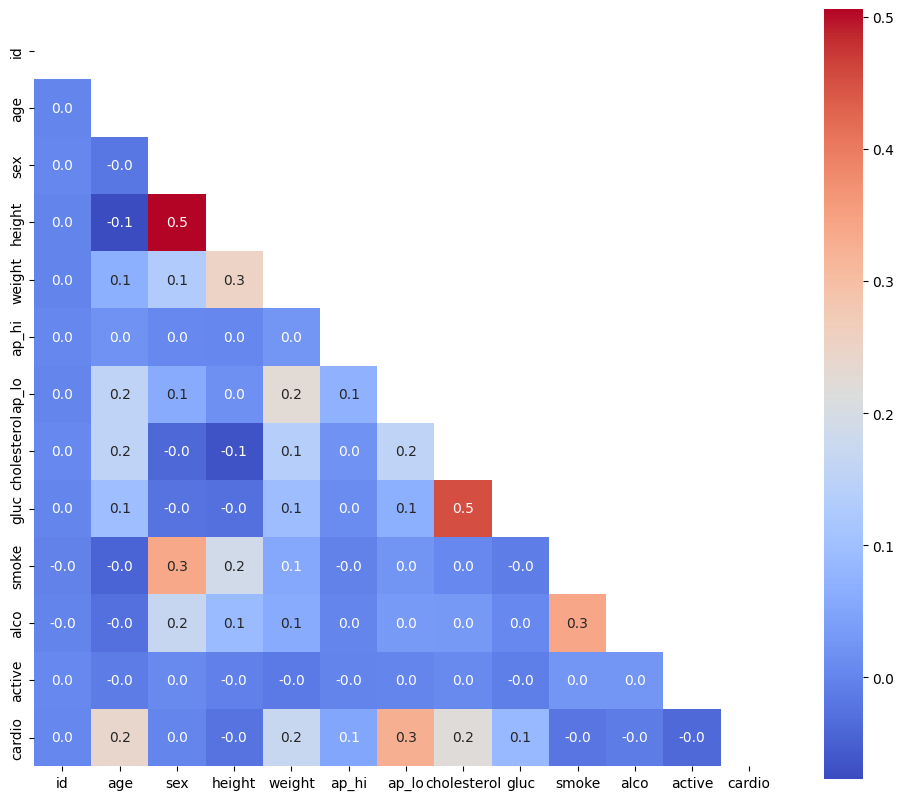

In [15]:
import matplotlib.pyplot as plt

# Draw categorical plot
cat_plot = draw_cat_plot()
plt.show()

# Draw heatmap
heat_map = draw_heat_map()
plt.show()